### Book 텍스트 분석 

단어 카운트세기, 시각화

In [1]:
from pyspark import SparkConf, SparkContext
# 스파크 환경 설정 객체 생성
conf = SparkConf().setMaster("local").setAppName("241206_01_RDD")
spark = SparkContext(conf=conf).getOrCreate()

24/12/06 11:37:38 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/12/06 11:37:39 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


In [2]:
import os
directory = os.path.join(os.getcwd(), "data")
filename = "Book"
filepath = os.path.join(directory, filename)

lines = spark.textFile("file:///"+filepath.replace("\\", "/"))
lines.take(5)

['Self-Employment: Building an Internet Business of One',
 'Achieving Financial and Personal Freedom through a Lifestyle Technology Business',
 'By Frank Kane',
 '',
 '']

In [3]:
map_words = lines.map(lambda x: x.split())
map_words.take(5)

[['Self-Employment:', 'Building', 'an', 'Internet', 'Business', 'of', 'One'],
 ['Achieving',
  'Financial',
  'and',
  'Personal',
  'Freedom',
  'through',
  'a',
  'Lifestyle',
  'Technology',
  'Business'],
 ['By', 'Frank', 'Kane'],
 [],
 []]

In [5]:
words = lines.flatMap(lambda x:x.split())
words.take(7)

['Self-Employment:', 'Building', 'an', 'Internet', 'Business', 'of', 'One']

In [6]:
wordCounts = words.countByValue()
wordCounts

defaultdict(int,
            {'Self-Employment:': 1,
             'Building': 5,
             'an': 172,
             'Internet': 13,
             'Business': 19,
             'of': 941,
             'One': 12,
             'Achieving': 1,
             'Financial': 3,
             'and': 901,
             'Personal': 3,
             'Freedom': 7,
             'through': 55,
             'a': 1148,
             'Lifestyle': 5,
             'Technology': 2,
             'By': 9,
             'Frank': 10,
             'Kane': 7,
             'Copyright': 1,
             '�': 174,
             '2015': 3,
             'Kane.': 1,
             'All': 13,
             'rights': 3,
             'reserved': 2,
             'worldwide.': 2,
             'CONTENTS': 1,
             'Disclaimer': 1,
             'Preface': 1,
             'Part': 2,
             'I:': 2,
             'Making': 5,
             'the': 1176,
             'Big': 1,
             'Decision': 1,
             'Overcoming'

In [13]:
# 텍스트 전처리
stop_words = {'a', 'an'}

In [19]:
filtered_word_counts = {k:v for k,v in wordCounts.items() if k.lower() not in stop_words and len(k)>5}
filtered_word_counts

{'Self-Employment:': 1,
 'Building': 5,
 'Internet': 13,
 'Business': 19,
 'Achieving': 1,
 'Financial': 3,
 'Personal': 3,
 'Freedom': 7,
 'through': 55,
 'Lifestyle': 5,
 'Technology': 2,
 'Copyright': 1,
 'rights': 3,
 'reserved': 2,
 'worldwide.': 2,
 'CONTENTS': 1,
 'Disclaimer': 1,
 'Preface': 1,
 'Making': 5,
 'Decision': 1,
 'Overcoming': 1,
 'Inertia': 1,
 'Failure': 1,
 'Career': 1,
 'Indoctrination': 2,
 'Carrot': 1,
 'Protection': 1,
 'Employer': 2,
 'Security': 2,
 'Blanket': 1,
 'Unlimited': 2,
 'Growth': 4,
 'Potential': 1,
 'Investing': 3,
 'Yourself,': 1,
 'Someone': 2,
 'Dependencies': 1,
 'Commute': 1,
 'Self-Employment': 1,
 'Flowchart:': 1,
 'Should': 3,
 'Consider': 5,
 'Self-Employment?': 2,
 'Having': 2,
 'Safety': 2,
 'Planning': 3,
 'Health': 2,
 'Self-Assessment': 1,
 'Happen': 1,
 'Designing': 1,
 'Fallacy': 1,
 'Introducing': 1,
 'Study:': 1,
 'Sundog': 20,
 'Software': 12,
 'Points': 1,
 'Evaluating': 1,
 'Writing': 4,
 'Description': 2,
 'Vision': 2,
 'De

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [28]:
top_words = sorted(filtered_word_counts.items(), key=lambda x:x[1], reverse=True)[:20]
word_list = [word for word, count in top_words]
word_counts_list = [count for word, count in top_words]

<BarContainer object of 20 artists>

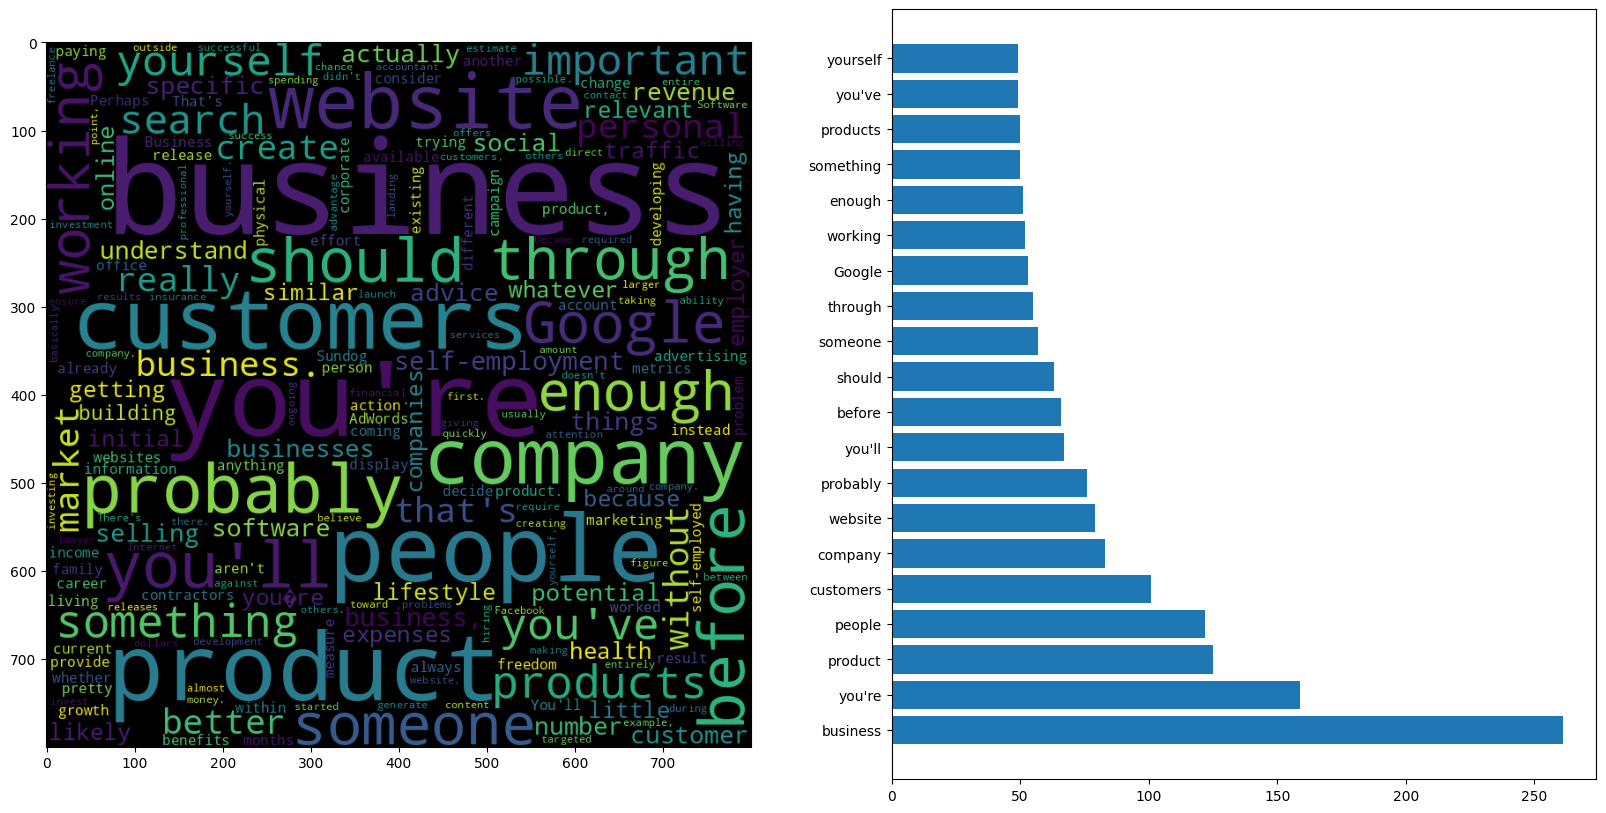

In [30]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
wc = WordCloud(width=800, height=800).generate_from_frequencies(filtered_word_counts)
plt.imshow(wc)

plt.subplot(1,2,2)
plt.barh(word_list, word_counts_list)